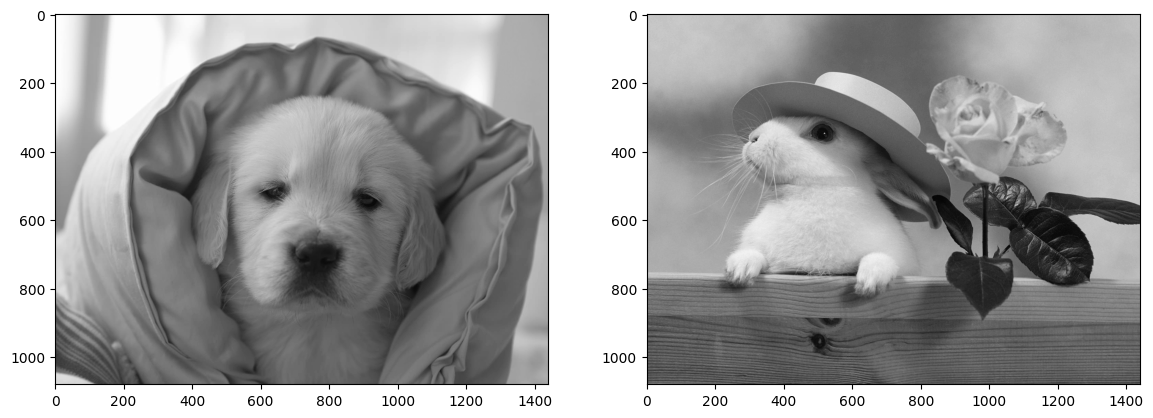

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dog = cv2.imread('img2.jpg', 0)
mouse = cv2.imread('img3.jpg', 0)

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(dog, cmap='gray')
plt.subplot(122)
plt.imshow(mouse, cmap='gray')
plt.show()

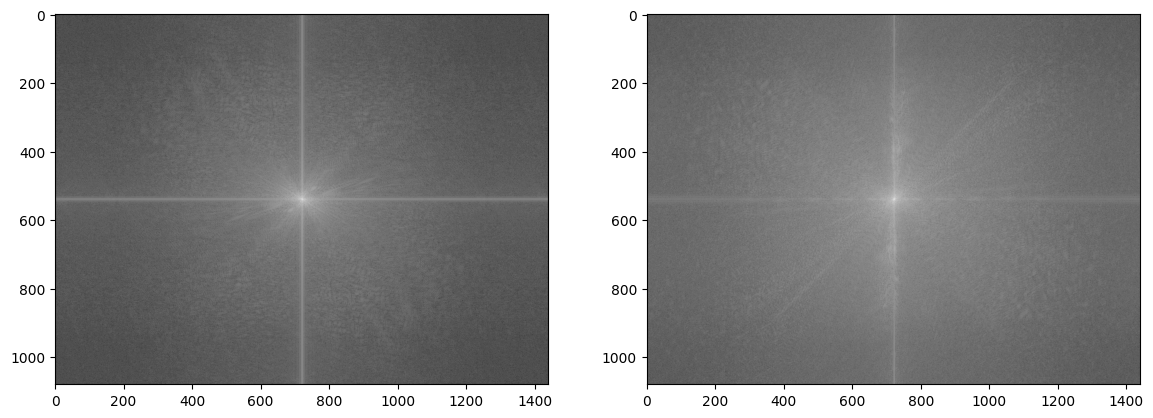

In [11]:
dog_fft = np.fft.fftshift(np.fft.fft2(dog))
mouse_fft = np.fft.fftshift(np.fft.fft2(mouse))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(np.abs(dog_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(mouse_fft)), cmap='gray')
plt.show()

In [13]:
dog_amplitude = np.sqrt(np.real(dog_fft) ** 2 + np.imag(dog_fft) ** 2)
dog_phase = np.arctan2(np.imag(dog_fft), np.real(dog_fft))
mouse_amplitude = np.sqrt(np.real(mouse_fft) ** 2 + np.imag(mouse_fft) ** 2)
mouse_phase = np.arctan2(np.imag(mouse_fft), np.real(mouse_fft))

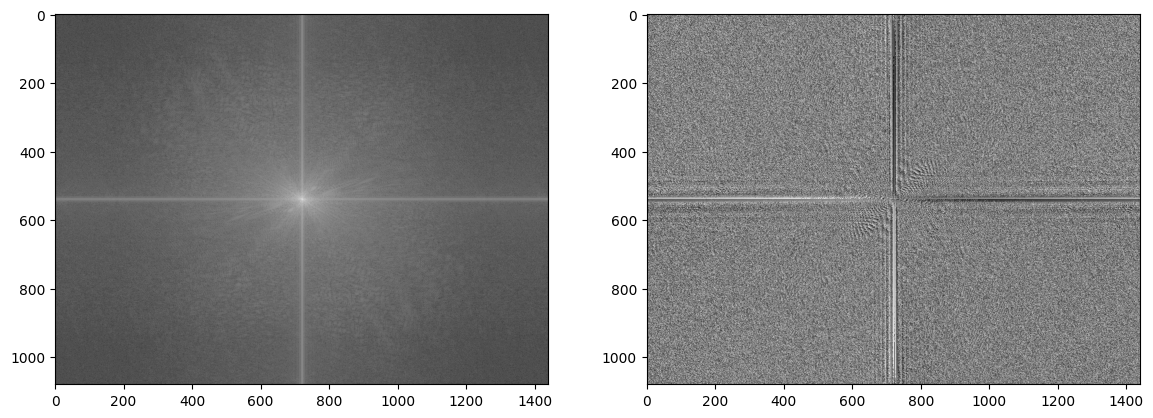

In [14]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(dog_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(dog_phase, cmap='gray')

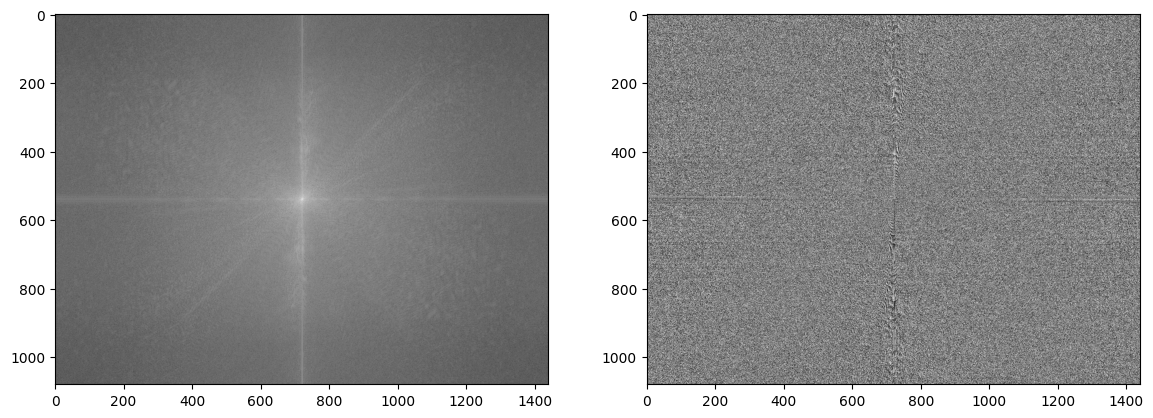

In [15]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(mouse_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(mouse_phase, cmap='gray')

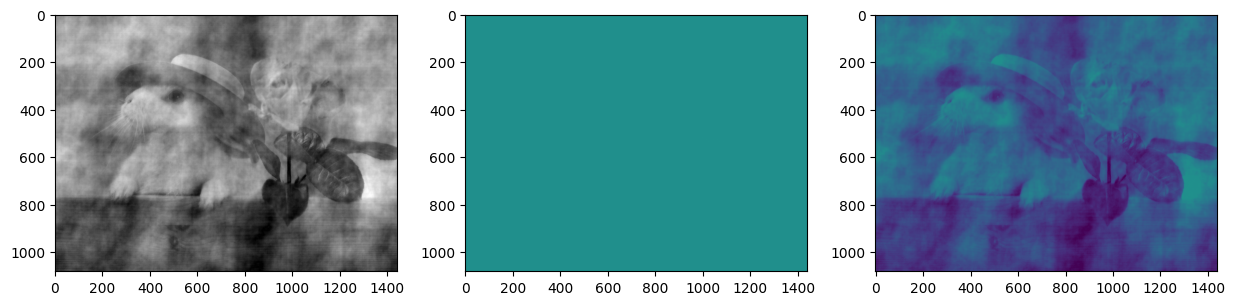

In [16]:
desert_coffee_comb = np.multiply(dog_amplitude, np.exp(1j * mouse_phase))
desert_coffee = np.real(np.fft.ifft2(desert_coffee_comb))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(desert_coffee), cmap='gray')
plt.subplot(132)
desert_coffee_shift = desert_coffee + desert_coffee.min()
desert_coffee_shift[desert_coffee_shift>255] = 255
plt.imshow(desert_coffee_shift)
plt.subplot(133)
desert_coffee[desert_coffee>255] = 255
desert_coffee[desert_coffee <0] = 0
plt.imshow(desert_coffee)


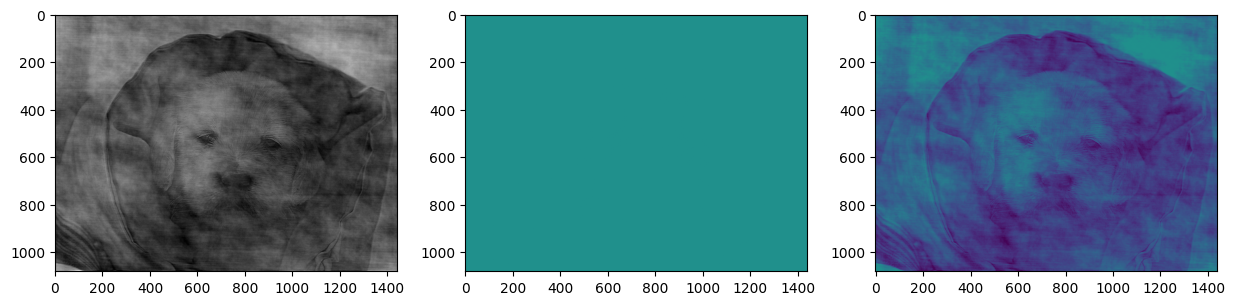

In [17]:
desert_coffee_comb = np.multiply(mouse_amplitude, np.exp(1j * dog_phase))
desert_coffee = np.real(np.fft.ifft2(desert_coffee_comb))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(desert_coffee), cmap='gray')
plt.subplot(132)
desert_coffee_shift = desert_coffee + desert_coffee.min()
desert_coffee_shift[desert_coffee_shift>255] = 255
plt.imshow(desert_coffee_shift)
plt.subplot(133)
desert_coffee[desert_coffee>255] = 255
desert_coffee[desert_coffee <0] = 0
plt.imshow(desert_coffee)


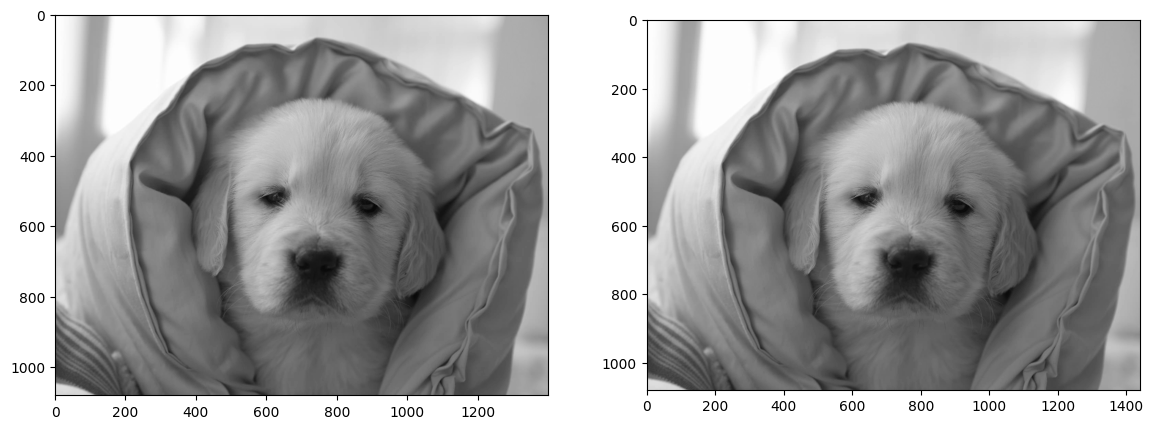

In [28]:
new_img = cv2.resize(dog, (1400, 1080))
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(new_img, cmap='gray')
plt.subplot(122)
plt.imshow(dog, cmap='gray')
plt.show()

In [26]:
# import required module
from PIL import Image

# get image
filepath = "img2.jpg"
img = Image.open(filepath)

# get width and height
width = img.width
height = img.height

# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)


The height of the image is:  1080
The width of the image is:  1440
